In [1]:
import sys
sys.path.insert(0,'/home/csunix/schtmt/NewFolder/caffe_Sep/python')
import numpy as np
import matplotlib.pyplot as plt
import caffe
import h5py

#% matplotlib inline#THIS LINE HAS ERROR -> USE THE FOLLOWING 2 LINES
# from IPython import get_ipython
# get_ipython().run_line_magic('matplotlib', 'inline')

caffe.set_device(0)
caffe.set_mode_gpu()
# 
# load the test model
net = caffe.Net('encode-decode_Sep_test.prototxt',
                '/usr/not-backed-up/1_convlstm/mnist_convlstm_AE/iter_iter_261000.caffemodel', 
                caffe.TEST)
# print the input and output tensor infos,
# for layer_name, blob in net.blobs.items():
#     print(layer_name + str(blob.data.shape))
print([(k, v.data.shape) for k, v in net.blobs.items()]) # Python data type: list

[('sequence', (19, 1)), ('seq_enc', (10, 1)), ('seq_dec', (9, 1)), ('input', (1, 10, 1, 64, 64)), ('match', (1, 10, 1, 64, 64)), ('input_p', (10, 1, 1, 64, 64)), ('match_p', (10, 1, 1, 64, 64)), ('dummy', (1, 1, 128, 64, 64)), ('dummy_dummy_0_split_0', (1, 1, 128, 64, 64)), ('dummy_dummy_0_split_1', (1, 1, 128, 64, 64)), ('encode1', (10, 1, 128, 64, 64)), ('encode1_h', (1, 1, 128, 64, 64)), ('encode1_c', (1, 1, 128, 64, 64)), ('input_decode1', (9, 1, 1, 64, 64)), ('decode1', (9, 1, 128, 64, 64)), ('decode1_h', (1, 1, 128, 64, 64)), ('decode1_c', (1, 1, 128, 64, 64)), ('encode1_top_discard', (9, 1, 128, 64, 64)), ('encode1_slice', (1, 1, 128, 64, 64)), ('decode', (10, 1, 128, 64, 64)), ('output', (10, 1, 1, 64, 64)), ('out_flat', (10, 4096)), ('out_flat_flat_data_0_split_0', (10, 4096)), ('out_flat_flat_data_0_split_1', (10, 4096)), ('match_flat', (10, 4096)), ('match_flat_flat_match_0_split_0', (10, 4096)), ('match_flat_flat_match_0_split_1', (10, 4096)), ('cross_entropy_loss', ()), ('

In [2]:
# 
# # weight infos,
print([(k, v[0].data.shape, v[1].data.shape) for k, v in net.params.items()])
# for k,v in net.params.items():
#     print(k + str(v[0].data.shape) + str(v[1].data.shape))
    
h5f = h5py.File('/usr/not-backed-up/1_convlstm/bouncing_mnist_autoencoder_test.h5','r')
data = h5f['input'][:] 
match = h5f['match'][:]
print(data.shape)
print(match.shape)
data_input = np.reshape(data[100,:,:,:,:],[1,10,1,64,64])
match_input = np.reshape(match[100,:,:,:,:],[1,10,1,64,64])
print(data_input.shape)

[('encode1', (512, 1, 5, 5), (1,)), ('decode1', (1,), (1,)), ('output_conv', (1, 128, 1, 1), (1,))]
(1000, 10, 1, 64, 64)
(1000, 10, 1, 64, 64)
(1, 10, 1, 64, 64)


In [3]:
net.blobs['input'].reshape(1,10,1,64,64)
net.blobs['input'].data[...] = data_input
net.blobs['match'].reshape(1,10,1,64,64)
net.blobs['match'].data[...] = match_input

In [4]:
out = net.forward()

In [5]:
print(out.keys)

<built-in method keys of dict object at 0x7f6d91031e88>


In [6]:
in_ = net.blobs['input'].data
print(in_.shape)
match_ = net.blobs['match'].data
print(match_.shape)
recons = net.blobs['output'].data
print(recons.shape)

(1, 10, 1, 64, 64)
(1, 10, 1, 64, 64)
(10, 1, 1, 64, 64)


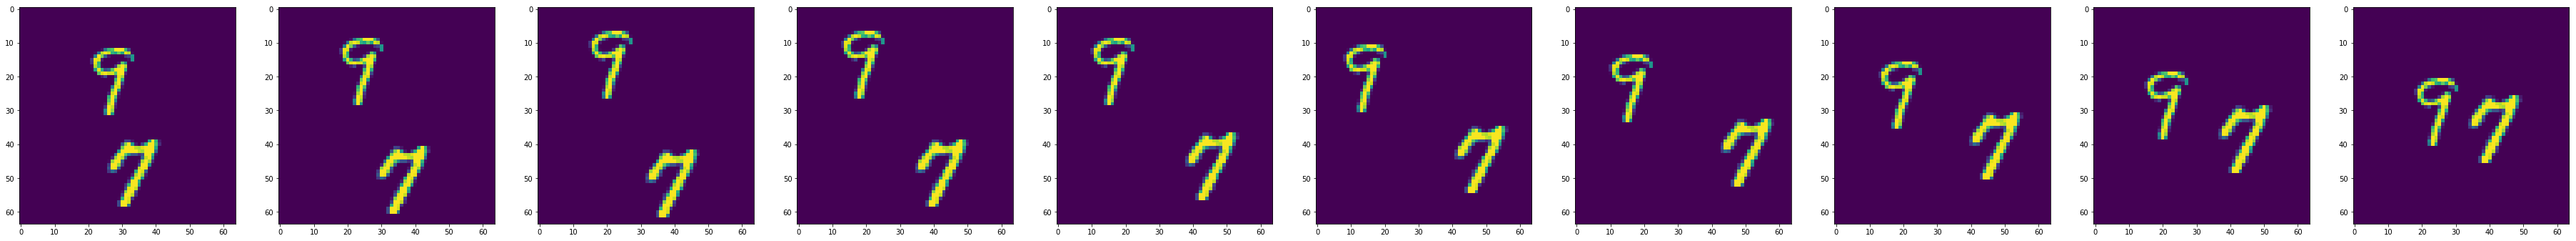

In [7]:
plt.figure(figsize=(64,64))
# plt.suptitle('input', fontsize=160)
for i in range(10):
#     print(i)
    plt.subplot(1,10,i+1)
    im = np.reshape(in_[:,i,:,:,:],[64,64])
#     print(im.shape)
    plt.imshow(im)
plt.show()

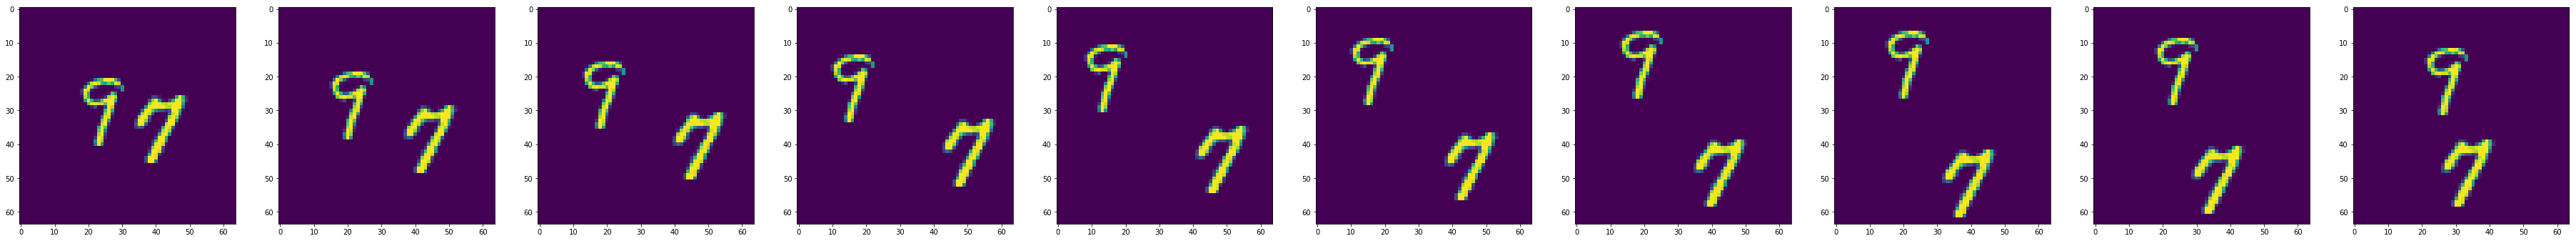

In [8]:
# match
plt.figure(figsize=(64,64))
for i in range(10):
#     print(i)
    plt.subplot(1,10,i+1)
    im = np.reshape(match_[:,i,:,:,:],[64,64])
#     print(im.shape)
    plt.imshow(im)
plt.show()

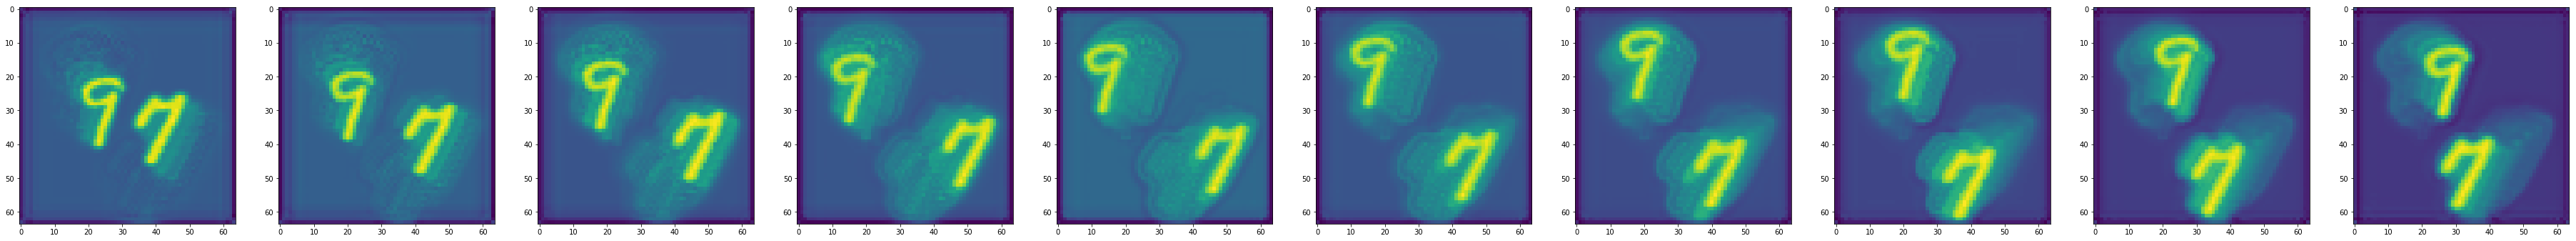

In [9]:
# reconstruction
plt.figure(figsize=(64,64))
for i in range(10):
#     print(i)
    plt.subplot(1,10,i+1)
    im = np.reshape(recons[i,:,:,:,:],[64,64])
#     print(im.shape)
    plt.imshow(im)
plt.show()

In [10]:
loss = net.blobs['cross_entropy_loss'].data
print(loss)

88.0792999268


In [11]:
l2 = net.blobs['l2_error'].data
print(l2)

0.312908500433
